In [1]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from pyts.transformation import BagOfPatterns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Inspeccionar las claves dentro del archivo HDF5
with h5py.File("train.h5", "r") as f_train:
    print("Claves disponibles en el archivo 'train.h5':")
    for key in f_train.keys():
        print(key)

# Paso 2: Cargar los datos
with h5py.File("train.h5", "r") as f_train:
    X_train = np.stack([
        f_train['body_acc_x'][:],
        f_train['body_acc_y'][:],
        f_train['body_acc_z'][:],
        f_train['body_gyro_x'][:],
        f_train['body_gyro_y'][:],
        f_train['body_gyro_z'][:],
        f_train['total_acc_x'][:],
        f_train['total_acc_y'][:],
        f_train['total_acc_z'][:]
    ], axis=-1)
    y_train = np.array(f_train['y'])

with h5py.File("test.h5", "r") as f_test:
    X_test = np.stack([
        f_test['body_acc_x'][:],
        f_test['body_acc_y'][:],
        f_test['body_acc_z'][:],
        f_test['body_gyro_x'][:],
        f_test['body_gyro_y'][:],
        f_test['body_gyro_z'][:],
        f_test['total_acc_x'][:],
        f_test['total_acc_y'][:],
        f_test['total_acc_z'][:]
    ], axis=-1)

# Verificación
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)



Claves disponibles en el archivo 'train.h5':
body_acc_x
body_acc_y
body_acc_z
body_gyro_x
body_gyro_y
body_gyro_z
total_acc_x
total_acc_y
total_acc_z
y
X_train: (7352, 128, 9)
y_train: (7352,)
X_test: (2947, 128, 9)


C:\Users\u63055\AppData\Local\Temp\1\ipykernel_19092\2880500090.py:32: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  y_train = np.array(f_train['y'])


In [2]:
from sklearn.model_selection import train_test_split
from pyts.transformation import BagOfPatterns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Aplanar los datos para incluir todos los canales
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Estandarización
scaler = StandardScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los datos aplanados y las etiquetas
# Asegúrate de que X_train_flattened y y_train estén definidos
df = pd.DataFrame(data=X_train_flattened)
df['target'] = y_train

# Mostrar información básica del dataset
print("Forma del dataset:", df.shape)
print("Primeras filas del dataset:\n", df.head())
print("Descripción del dataset:\n", df.describe())

# Distribución de las clases
print("\nDistribución de las clases:")
print(df['target'].value_counts())

Forma del dataset: (7352, 1153)
Primeras filas del dataset:
           0         1         2         3         4         5         6  \
0  0.017925  0.089166  0.455996  0.073846  0.152126  0.076115  0.504240   
1  0.022529 -0.033828 -0.285218  0.042584 -0.007832  0.035188  0.518812   
2  0.034821  0.038941 -0.096858  0.064280 -0.024822 -0.003878  0.529139   
3  0.008076 -0.077583 -0.034195 -0.087974 -0.058602 -0.015594  0.515989   
4  0.017454 -0.027218 -0.163576 -0.044748 -0.047187 -0.018304  0.521471   

          7         8         9  ...      1143      1144      1145      1146  \
0 -0.385819  0.035007  0.065842  ... -0.002018  0.046309 -0.033746  0.078614   
1 -0.387761  0.020988  0.037531  ... -0.017938 -0.038148 -0.044457 -0.085483   
2 -0.377631  0.001902  0.026056  ...  0.001002 -0.023747 -0.133637 -0.040695   
3 -0.411876  0.013206  0.007836  ... -0.010060  0.010876 -0.055701 -0.008795   
4 -0.399922 -0.026882  0.013102  ... -0.026612  0.081977  0.030344  0.046477   

       

DataFrame reducido con nombres de etiquetas:
   body_acc_x  body_acc_y  body_acc_z  body_gyro_x  body_gyro_y  body_gyro_z  \
0    0.089349    0.055015    0.031263     0.007930    -0.001041     0.010866   
1   -0.001323    0.016468    0.012986     0.013273     0.017360     0.022940   
2    0.009896    0.030857    0.035579     0.040378    -0.003653     0.011607   
3   -0.000940    0.001711    0.001908    -0.008797    -0.014889    -0.001492   
4   -0.013374    0.003483    0.001127     0.004933    -0.002347     0.012870   

   total_acc_x  total_acc_y  total_acc_z  target target_nombre  
0     0.010329     0.017168     0.012596     5.0        De pie  
1     0.030050     0.043665     0.015568     5.0        De pie  
2    -0.006621     0.004568    -0.020652     5.0        De pie  
3    -0.002470     0.005667    -0.000356     5.0        De pie  
4     0.017264     0.020234     0.023232     5.0        De pie  


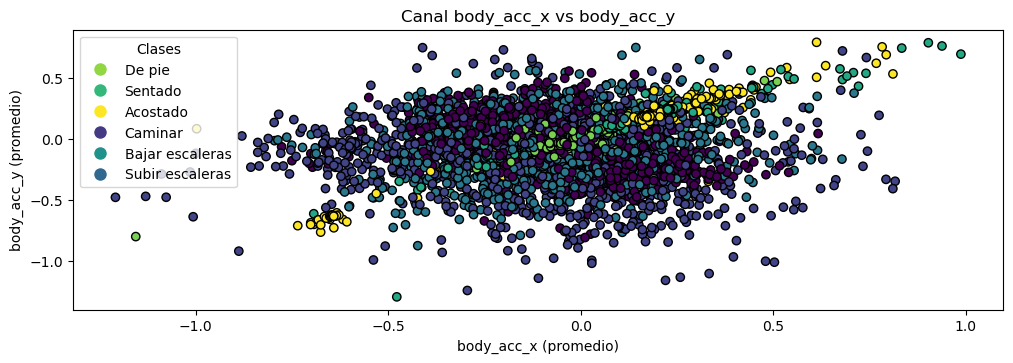

In [5]:
# Número de puntos de tiempo por canal
n_tiempo = 128  # Ajusta este valor según tu dataset
n_canales = 9   # Número total de canales

# Crear un DataFrame reducido con métricas agregadas por canal
canales = ['body_acc_x', 'body_acc_y', 'body_acc_z',
           'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
           'total_acc_x', 'total_acc_y', 'total_acc_z']

df_canales = pd.DataFrame()

for i, canal in enumerate(canales):
    inicio = i * n_tiempo
    fin = inicio + n_tiempo
    df_canales[canal] = df.iloc[:, inicio:fin].mean(axis=1)  # Promedio por canal

# Agregar la columna 'target' al DataFrame reducido
df_canales['target'] = df['target']

# Diccionario de etiquetas
etiquetas = {
    1.0: "Caminar",
    2.0: "Subir escaleras",
    3.0: "Bajar escaleras",
    4.0: "Sentado",
    5.0: "De pie",
    6.0: "Acostado"
}

# Reemplazar los valores numéricos de 'target' por sus nombres
df_canales['target_nombre'] = df_canales['target'].map(etiquetas)

# Mostrar el DataFrame reducido con nombres de etiquetas
print("DataFrame reducido con nombres de etiquetas:")
print(df_canales.head())

# Gráfico de dispersión para dos canales
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
scatter = plt.scatter(df_canales['body_acc_x'], df_canales['body_acc_y'], c=df_canales['target'], cmap='viridis', edgecolor='k')
plt.title('Canal body_acc_x vs body_acc_y')
plt.xlabel('body_acc_x (promedio)')
plt.ylabel('body_acc_y (promedio)')

# Agregar leyenda con nombres de etiquetas
# Obtener los valores únicos de las clases
clases_unicas = df_canales['target'].unique()
# Crear los elementos de la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(c / max(clases_unicas)), markersize=10) for c in clases_unicas]
labels = [etiquetas[c] for c in clases_unicas]
plt.legend(handles, labels, title="Clases")
